# Exercises

Create a file named `seaborn_exercises.py` or `seaborn_exercises.ipynb` for this exercise.

Use the `iris` database to answer the following quesitons:

In [1]:
import seaborn as sns
import pandas as pd
from pydataset import data
import matplotlib.pyplot as plt
import numpy as np

iris = data('iris')
iris.head()
iris = sns.load_dataset('iris') # same as pydataset except column names are named funny

In [2]:
print(iris.shape)
data('iris', show_doc = True)

(150, 5)
iris

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Edgar Anderson's Iris Data

### Description

This famous (Fisher's or Anderson's) iris data set gives the measurements in
centimeters of the variables sepal length and width and petal length and
width, respectively, for 50 flowers from each of 3 species of iris. The
species are _Iris setosa_, _versicolor_, and _virginica_.

### Usage

    iris
    iris3

### Format

`iris` is a data frame with 150 cases (rows) and 5 variables (columns) named
`Sepal.Length`, `Sepal.Width`, `Petal.Length`, `Petal.Width`, and `Species`.

`iris3` gives the same data arranged as a 3-dimensional array of size 50 by 4
by 3, as represented by S-PLUS. The first dimension gives the case number
within the species subsample, the second the measurements with names `Sepal
L.`, `Sepal W.`, `Petal L.`, and `Petal W.`, and the third the species.

### Source

Fisher, R. A. (1936) The use of multiple measurements in

In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


1. What does the distribution of petal lengths look like?
#### It appears to be bimodal

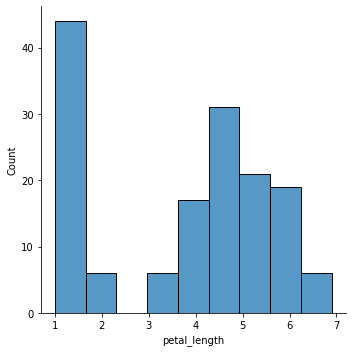

In [4]:
sns.displot(data = iris, x = 'petal_length') # can put, kde = true, for curved line



2. Is there a correlation between petal length and petal width? Use http://guessthecorrelation.com/ as a hint to how we could visually determine if a correlation exists between two numeric columns.
#### Yes, there's a very high correlation starting at 0.96

In [5]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [6]:
iris.corr().iloc[2:, 2:]

# Rev sns.relplot(data = iris, x = 'petal_length', y = 'petal_width', hue = 'species')

,petal_length,petal_width
petal_length,1.000000,0.962865
petal_width,0.962865,1.000000


<AxesSubplot:>

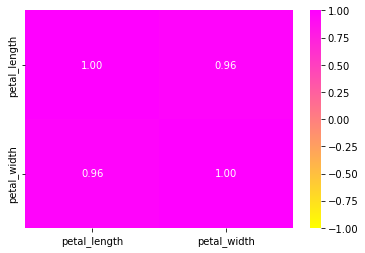

In [7]:
sns.heatmap(iris.corr().iloc[2:, 2:], annot = True, fmt = '0.2f', cmap = 'spring_r', center = 0, vmin = -1)


3. Would it be reasonable to predict species based on sepal width and sepal length? For this, you'll visualize two numeric columns through the lense of a categorical column.

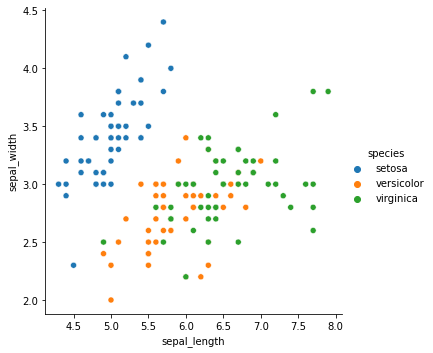

In [8]:
sns.relplot(data = iris, x = 'sepal_length', y = 'sepal_width', hue = 'species')

4. Which features would be best used to predict species?

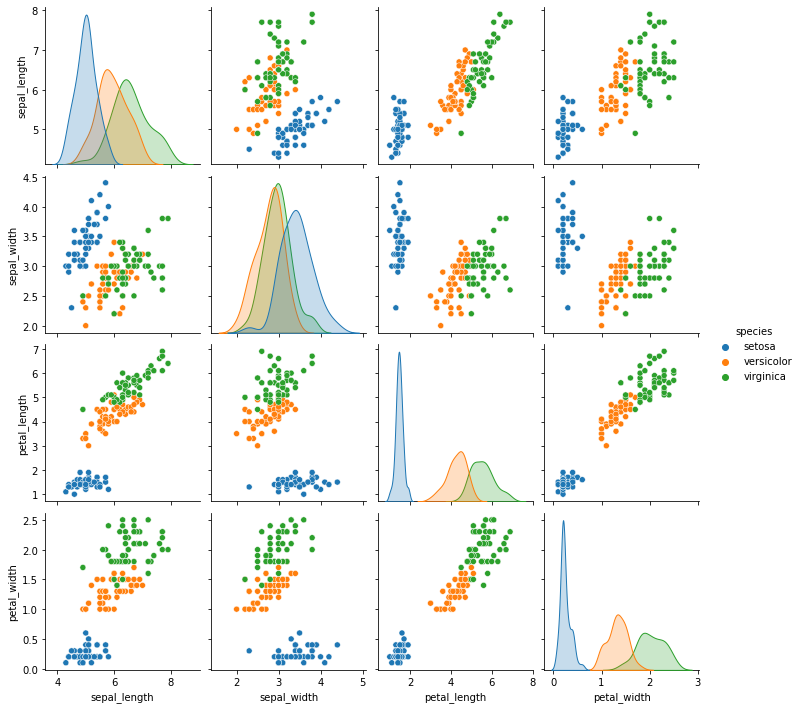

In [9]:
sns.pairplot(data = iris, hue = 'species')

1. Using the lesson as an example, use seaborn's `load_dataset` function to load the `anscombe` data set. Use pandas to group the data by the `dataset` column, and calculate summary statistics for each dataset. What do you notice?

Plot the x and y values from the `anscombe` data. Each dataset should be in a separate column.

In [10]:
df = sns.load_dataset('anscombe')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  44 non-null     object 
 1   x        44 non-null     float64
 2   y        44 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


In [12]:
df.groupby('dataset')[['x', 'y']].agg(['mean', 'median', 'std'])

x                          y                 
        mean median       std      mean median       std
dataset                                                 
I        9.0    9.0  3.316625  7.500909   7.58  2.031568
II       9.0    9.0  3.316625  7.500909   8.14  2.031657
III      9.0    9.0  3.316625  7.500000   7.11  2.030424
IV       9.0    8.0  3.316625  7.500909   7.04  2.030579

In [13]:
df.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

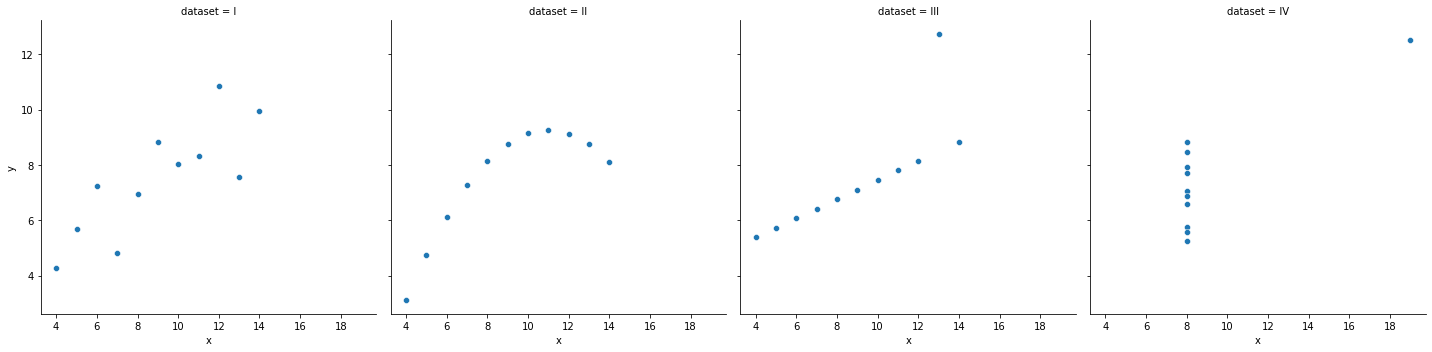

In [14]:
sns.relplot(data = df, x = 'x', y = 'y', col = 'dataset')

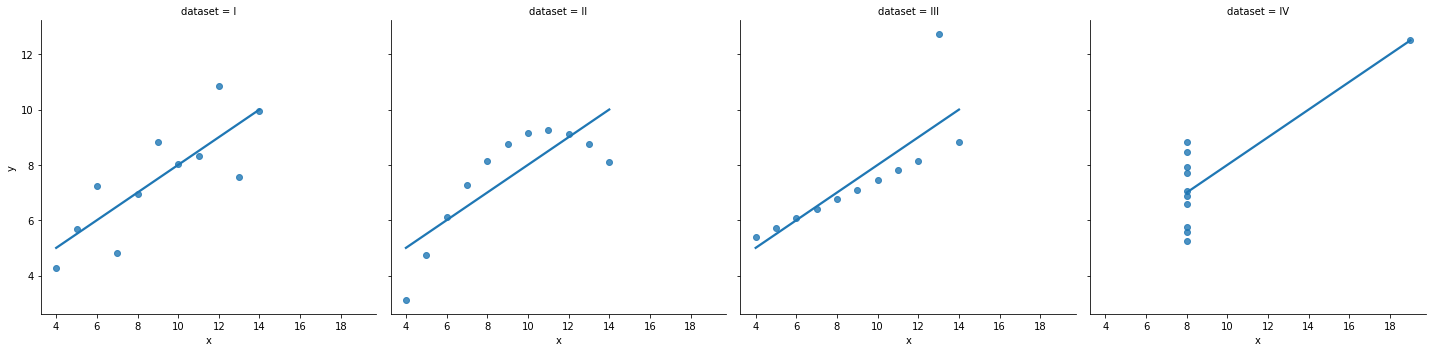

In [15]:
# Rev
# outliers and it's impact
sns.lmplot(data = df, x = 'x', y ='y', col = 'dataset', ci = 0)

#### 2. Load the `InsectSprays` dataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

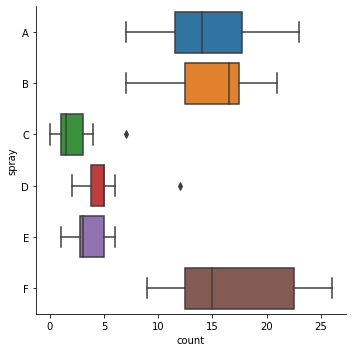

In [16]:
InsectSprays = data('InsectSprays')
data('InsectSprays', show_doc = True)
print(InsectSprays.spray.unique())
sns.catplot(data = InsectSprays, kind = 'box', y = 'spray', x = 'count')


In [17]:
# Rev  
InsectSprays.head()

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A


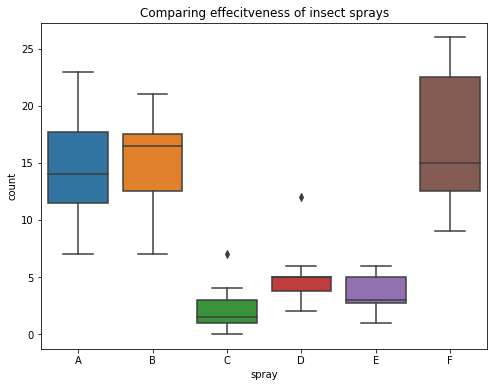

In [18]:
#Rev
plt.figure(figsize=(8, 6))
sns.boxplot(y = 'count', data = InsectSprays, x = 'spray')
plt.title('Comparing effecitveness of insect sprays')
plt.show()

#### 3. Load the `swiss` dataset and read it's documentation. The `swiss` dataset is available from `pydatset` rather than seaborn. Create visualizations to answer the following questions:

In [19]:
swiss = data('swiss')
data('swiss', show_doc = True)
swiss

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6
Porrentruy,76.1,35.3,9,7,90.57,26.6
Broye,83.8,70.2,16,7,92.85,23.6
Glane,92.4,67.8,14,8,97.16,24.9
Gruyere,82.4,53.3,12,7,97.67,21.0
Sarine,82.9,45.2,16,13,91.38,24.4


- Create an attribute named `is_catholic` that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)

<AxesSubplot:ylabel='Count'>

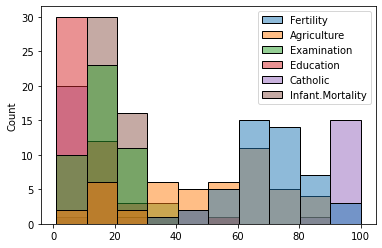

In [20]:
is_catholic = swiss[swiss.Catholic > 0]

sns.histplot(data = is_catholic)


In [21]:
# Rev 
swiss['is_catholic'] = swiss.Catholic > 50

- Does whether or not a province is Catholic influence fertility?

<AxesSubplot:xlabel='is_catholic', ylabel='Fertility'>

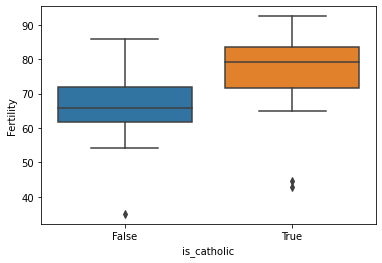

In [22]:
sns.boxplot(x = 'is_catholic', y = 'Fertility', data = swiss)

In [23]:
swiss.groupby('is_catholic').Fertility.mean()

is_catholic
False    66.220690
True     76.461111
Name: Fertility, dtype: float64

- What measure correlates most strongly with fertility?

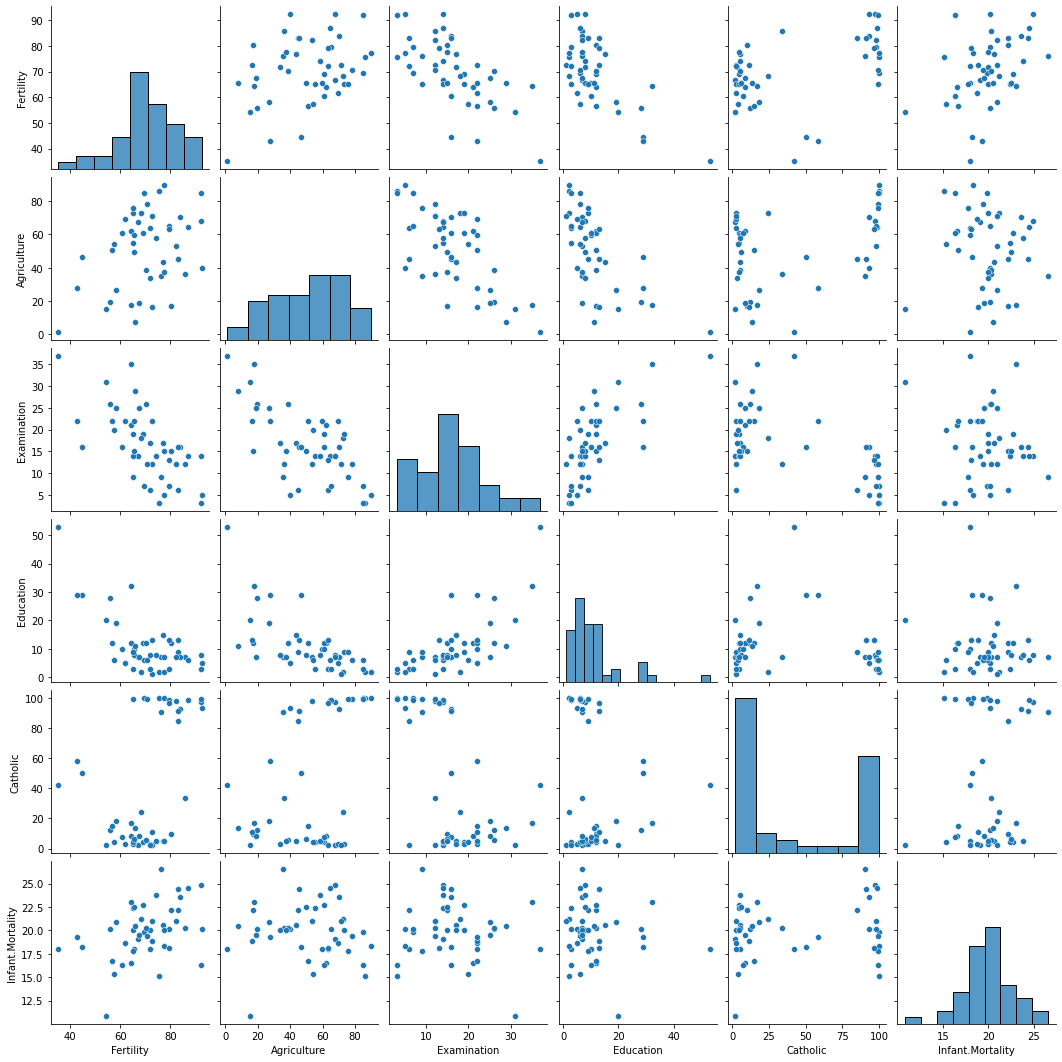

In [24]:
sns.pairplot(data = swiss.iloc[:, :-1])

In [25]:
swiss.corr()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Fertility,1.000000,0.353079,-0.645883,-0.663789,0.463685,0.416556,0.402813
Agriculture,0.353079,1.000000,-0.686542,-0.639523,0.401095,-0.060859,0.410503
Examination,-0.645883,-0.686542,1.000000,0.698415,-0.572742,-0.114022,-0.597861
Education,-0.663789,-0.639523,0.698415,1.000000,-0.153859,-0.099322,-0.154677
Catholic,0.463685,0.401095,-0.572742,-0.153859,1.000000,0.175496,0.961723
Infant.Mortality,0.416556,-0.060859,-0.114022,-0.099322,0.175496,1.000000,0.166081
is_catholic,0.402813,0.410503,-0.597861,-0.154677,0.961723,0.166081,1.000000


In [26]:
swiss.corr().Fertility

Fertility           1.000000
Agriculture         0.353079
Examination        -0.645883
Education          -0.663789
Catholic            0.463685
Infant.Mortality    0.416556
is_catholic         0.402813
Name: Fertility, dtype: float64

#### 4. Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.

In [27]:
from env import get_db_url

url = get_db_url('chipotle')
pd.read_sql('SELECT * FROM orders', url)
chip = pd.read_sql('SELECT * FROM orders', url)
chip

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98
...,...,...,...,...,...,...
4617,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4618,4619,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4619,4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto Beans, Guacamole, Lettuce]]",$11.25
4620,4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettuce]]",$8.75


In [28]:
chip.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [29]:
best_sellers = chip.groupby('item_name').quantity.sum().nlargest(4)
best_sellers

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Name: quantity, dtype: int64

In [30]:
best_sellers.index

Index(['Chicken Bowl', 'Chicken Burrito', 'Chips and Guacamole',
       'Steak Burrito'],
      dtype='object', name='item_name')

In [34]:
revenue = chip[chip.item_name.isin(best_sellers.index)].groupby('item_name').item_price.sum()
revenue

item_name
Chicken Bowl           $16.98 $10.98 $11.25 $8.75 $8.49 $11.25 $8.75 $8.75 $8.75 $8.75 $11.25 $11.25 $11.25 $...
Chicken Burrito        $8.49 $8.49 $10.98 $8.49 $10.98 $10.98 $8.75 $10.98 $8.75 $8.75 $8.75 $8.75 $8.49 $8.4...
Chips and Guacamole    $4.45 $4.45 $4.45 $4.45 $4.45 $3.99 $4.45 $3.99 $4.45 $4.45 $4.45 $4.45 $3.99 $4.45 $4...
Steak Burrito          $11.75 $9.25 $8.99 $11.75 $8.99 $8.99 $8.99 $8.99 $8.99 $8.99 $8.99 $8.99 $8.99 $9.25 ...
Name: item_price, dtype: object

In [35]:
chip[chip.item_name.isin(best_sellers.index)]

,id,order_id,quantity,item_name,choice_description,item_price
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98
5,6,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sour Cream, Guacamole, Lettuce]]",$10.98
7,8,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables, Black Beans, Pinto Beans, Cheese, Sour...",$11.75
9,10,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto Beans, Cheese, Sour Cream, Lettuce]]",$9.25
10,11,5,1,Chips and Guacamole,nan,$4.45
...,...,...,...,...,...,...
4607,4608,1829,1,Steak Burrito,"[Tomatillo Green Chili Salsa, [Rice, Cheese, Sour Cream, Guacamole]]",$11.75
4610,4611,1830,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4616,4617,1832,1,Chips and Guacamole,nan,$4.45
4617,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75


In [37]:
plt.figure(figsize = (8,6))

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

5. Load the `sleepstudy` data and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

In [38]:
sleepstudy = data('sleepstudy')

In [39]:
sleepstudy['Subject'] = 'Subject_' + sleepstudy.Subject.astype(str)

In [40]:
sleepstudy.head()

,Reaction,Days,Subject
1,249.5600,0,Subject_308
2,258.7047,1,Subject_308
3,250.8006,2,Subject_308
4,321.4398,3,Subject_308
5,356.8519,4,Subject_308


<AxesSubplot:xlabel='Days', ylabel='Reaction'>

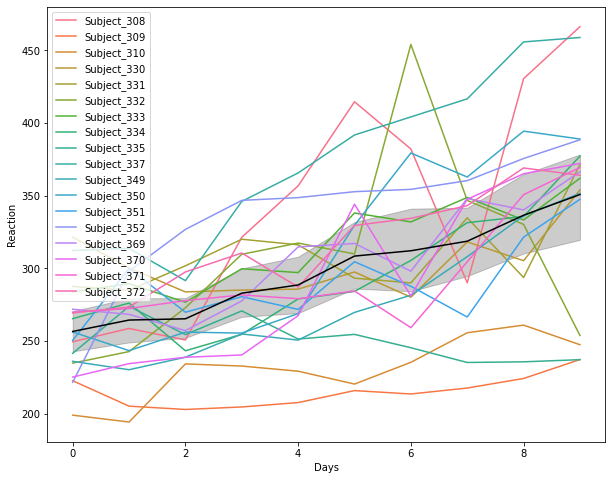

In [41]:
plt.figure(figsize=(10, 8))

sns.lineplot(data = sleepstudy, x = 'Days', y = 'Reaction', hue = 'Subject')
sns.lineplot(data = sleepstudy, x = 'Days', y = 'Reaction', color = 'black')